# Capstone - Team 18
## Topic Analysis

Installs if necessary

In [1]:
#install 
#! pip3 install pandas
#! pip3 install numpy
#! pip3 install wordcloud
#! pip3 install matplotlib
#! pip3 install regex
#! pip3 install plotly 
#! pip3 install spacy
#! pip3 install gensim
#! pip3 install nltk
#! pip3 install afinn
#! pip3 install -U scikit-learn
#! pip3 install seaborn
#! pip3 install nbformat

Imports

In [2]:
# imports
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections

import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


import string
import spacy
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
from afinn import Afinn
import unicodedata

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>


# Stopwords 
In the following step we are gonna remove the punction,do tokenization and remove the stop words. We creat three new column which are review_punct, review_tokenized, and review_nonstop.
Next, we will use the review_nonstop column to find the most common words and try to remove additional words which doesn't meaningful for our analysis. The top 20 most common words are: bjs, place, store, good, prices, great, service, always, shopping, customer, staff, shop, get, selection, items, bulk, friendly, clean, everything, and one. Then we move words: "i","always","shop","place","store","get","good","great","love","everything","like","bjs","one","lot","best","go","nice","went","people","really","need","bj","buy","dont","thing", and "today" and created a new column which called review_nonsense.

In [3]:
bj_r_text_eng = pd.read_csv("bj_r_text_eng.csv")
bj_r_text_eng.head()

#bj_r_text_eng.to_csv("/Users/paulademacker/Documents/GitHub/Capstone/bj_r_text_eng.csv",index=False)

,star rating,name,review,date,location_code,dif_lang,year,length
0,5,XxbluewølfX x,Eric has great customer service. He told me to...,2021-03-01,1,-1,2021,191
1,4,Biswanath Roy,Not ample stock compare to other stores. Other...,2020-10-01,1,-1,2020,96
2,1,Amy Rose,This location has been my reliable go-to for m...,2021-02-01,1,-1,2021,231
3,1,Sabina Lamichhane,I place a online pick up order to save some ti...,2021-02-01,1,-1,2021,240
4,1,Donnie L.S,Do something!!!\nmake a self checkout line oth...,2021-02-01,1,-1,2021,106


In [4]:
bj_r_text_eng["review"] = bj_r_text_eng["review"].str.lower()

In [5]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

bj_r_text_eng['review_punct'] = bj_r_text_eng['review'].apply(lambda x: remove_punct(x))
bj_r_text_eng.head(5)

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct
0,5,XxbluewølfX x,eric has great customer service. he told me to...,2021-03-01,1,-1,2021,191,eric has great customer service he told me to ...
1,4,Biswanath Roy,not ample stock compare to other stores. other...,2020-10-01,1,-1,2020,96,not ample stock compare to other stores other ...
2,1,Amy Rose,this location has been my reliable go-to for m...,2021-02-01,1,-1,2021,231,this location has been my reliable goto for ma...
3,1,Sabina Lamichhane,i place a online pick up order to save some ti...,2021-02-01,1,-1,2021,240,i place a online pick up order to save some ti...
4,1,Donnie L.S,do something!!!\nmake a self checkout line oth...,2021-02-01,1,-1,2021,106,do something\nmake a self checkout line other ...


In [7]:
# then we do tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

bj_r_text_eng['review_tokenized'] = bj_r_text_eng['review_punct'].apply(lambda x: tokenization(x))
bj_r_text_eng.head(5)

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct,review_tokenized
0,5,XxbluewølfX x,eric has great customer service. he told me to...,2021-03-01,1,-1,2021,191,eric has great customer service he told me to ...,"[eric, has, great, customer, service, he, told..."
1,4,Biswanath Roy,not ample stock compare to other stores. other...,2020-10-01,1,-1,2020,96,not ample stock compare to other stores other ...,"[not, ample, stock, compare, to, other, stores..."
2,1,Amy Rose,this location has been my reliable go-to for m...,2021-02-01,1,-1,2021,231,this location has been my reliable goto for ma...,"[this, location, has, been, my, reliable, goto..."
3,1,Sabina Lamichhane,i place a online pick up order to save some ti...,2021-02-01,1,-1,2021,240,i place a online pick up order to save some ti...,"[i, place, a, online, pick, up, order, to, sav..."
4,1,Donnie L.S,do something!!!\nmake a self checkout line oth...,2021-02-01,1,-1,2021,106,do something\nmake a self checkout line other ...,"[do, something, make, a, self, checkout, line,..."


In [8]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
bj_r_text_eng['review_nonstop'] = bj_r_text_eng['review_tokenized'].apply(lambda x: remove_stopwords(x))
bj_r_text_eng.head(5)

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct,review_tokenized,review_nonstop
0,5,XxbluewølfX x,eric has great customer service. he told me to...,2021-03-01,1,-1,2021,191,eric has great customer service he told me to ...,"[eric, has, great, customer, service, he, told...","[eric, great, customer, service, told, use, re..."
1,4,Biswanath Roy,not ample stock compare to other stores. other...,2020-10-01,1,-1,2020,96,not ample stock compare to other stores other ...,"[not, ample, stock, compare, to, other, stores...","[ample, stock, compare, stores, everything, go..."
2,1,Amy Rose,this location has been my reliable go-to for m...,2021-02-01,1,-1,2021,231,this location has been my reliable goto for ma...,"[this, location, has, been, my, reliable, goto...","[location, reliable, goto, many, years, howeve..."
3,1,Sabina Lamichhane,i place a online pick up order to save some ti...,2021-02-01,1,-1,2021,240,i place a online pick up order to save some ti...,"[i, place, a, online, pick, up, order, to, sav...","[place, online, pick, order, save, time, every..."
4,1,Donnie L.S,do something!!!\nmake a self checkout line oth...,2021-02-01,1,-1,2021,106,do something\nmake a self checkout line other ...,"[do, something, make, a, self, checkout, line,...","[something, make, self, checkout, line, bj, ma..."


In [9]:
bj_r_text_review = bj_r_text_eng['review_nonstop']
bj_r_text_review = bj_r_text_review.to_string().split(",")
#bj_r_text_review

Printing the most common words. Choose yourself how many.


OK. The 20 most common words are as follows

 bjs :  1698
 place :  1533
 store :  1434
 good :  1386
 prices :  1334
 great :  1289
 service :  1081
 customer :  753
 always :  693
 shopping :  690
 staff :  653
 shop :  621
 get :  606
 selection :  590
 items :  578
 bulk :  537
 friendly :  535
 clean :  526
 everything :  496
 one :  486


<AxesSubplot:xlabel='Word'>

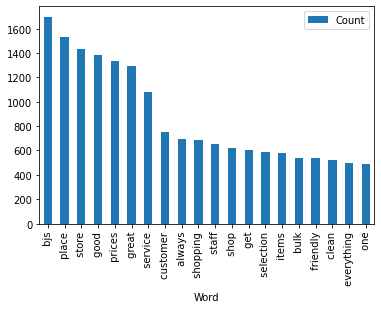

In [10]:
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(bj_r_text_review)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

Removing additional words

In [11]:
non_sense_word = ["i","always","shop","place","store","get","good","great","love","everything","like","bjs","one","lot","best","go","nice","went","people","really","need","bj","buy","dont","thing","today"]
def remove_nonsense(text):
    text = [word for word in text if word not in non_sense_word]
    return text
    
bj_r_text_eng['review_nonsense'] = bj_r_text_eng['review_nonstop'].apply(lambda x: remove_nonsense(x))
bj_r_text_eng.head(5)

,star rating,name,review,date,location_code,dif_lang,year,length,review_punct,review_tokenized,review_nonstop,review_nonsense
0,5,XxbluewølfX x,eric has great customer service. he told me to...,2021-03-01,1,-1,2021,191,eric has great customer service he told me to ...,"[eric, has, great, customer, service, he, told...","[eric, great, customer, service, told, use, re...","[eric, customer, service, told, use, receipt, ..."
1,4,Biswanath Roy,not ample stock compare to other stores. other...,2020-10-01,1,-1,2020,96,not ample stock compare to other stores other ...,"[not, ample, stock, compare, to, other, stores...","[ample, stock, compare, stores, everything, go...","[ample, stock, compare, stores, parking, spaces]"
2,1,Amy Rose,this location has been my reliable go-to for m...,2021-02-01,1,-1,2021,231,this location has been my reliable goto for ma...,"[this, location, has, been, my, reliable, goto...","[location, reliable, goto, many, years, howeve...","[location, reliable, goto, many, years, howeve..."
3,1,Sabina Lamichhane,i place a online pick up order to save some ti...,2021-02-01,1,-1,2021,240,i place a online pick up order to save some ti...,"[i, place, a, online, pick, up, order, to, sav...","[place, online, pick, order, save, time, every...","[online, pick, order, save, time, everytime, p..."
4,1,Donnie L.S,do something!!!\nmake a self checkout line oth...,2021-02-01,1,-1,2021,106,do something\nmake a self checkout line other ...,"[do, something, make, a, self, checkout, line,...","[something, make, self, checkout, line, bj, ma...","[something, make, self, checkout, line, manage..."


# Topic Analysis
To identify initial topics discussed in the reviews, we decided to display the 20 most frequently mentioned words in a word cloud. We removed additional adjectives in addition to the already eliminated stop words. By doing so, we only mapped nouns that indicate a specific area of BJ's, such as "price","service", "customer", "shopping", "coupon", "selection", "product", "item", "clean", "location", "time", "deal", "staff", "line", "cashier", "food", "experience", "bulk", "employee".

We also find out the top three most common topics that people are giving reviews for are “price”, “customer”, and “service”. In order to see if people are giving positive or negative feedback for those three topics, we use plt to draw a histogram for each topic. From the graph below, we can see that when people are talking about price, most of the time they give 5 starts. However, people are doing an opposite way for topic customer, they usually leave 1 star when they talking about topic customer. And for topic service, people mostly are giving 1 star and 5 stars, it is equally distributed between 1 and 5.




In [12]:
word_cloud = bj_r_text_eng['review_nonsense']
word_cloud = word_cloud.dropna()
#word_cloud = word_cloud.values.tolist()

In [13]:
# Function to convert  
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1

#word_cloud = listToString(word_cloud)
word_cloud = word_cloud.to_string()

Wordcloud with the 20 most common words

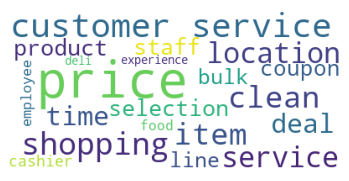

In [14]:
# word cloud with the most used words

wc = WordCloud(background_color = 'white',max_words = 20)
wordcloud = wc.generate(word_cloud)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Looking for different words.
First word is "price"

Text(0, 0.5, 'Number Of Reviews')

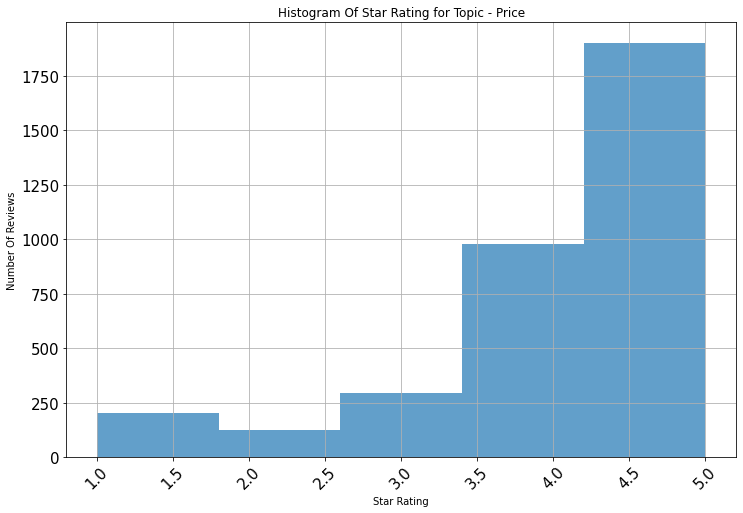

In [15]:
bj_r_text_eng['topic_price'] = bj_r_text_eng['review'].str.contains('price')
price = bj_r_text_eng.loc[bj_r_text_eng['topic_price'] == True]
price['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Price',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

Checking the reviews for "customer"

Text(0, 0.5, 'Number Of Reviews')

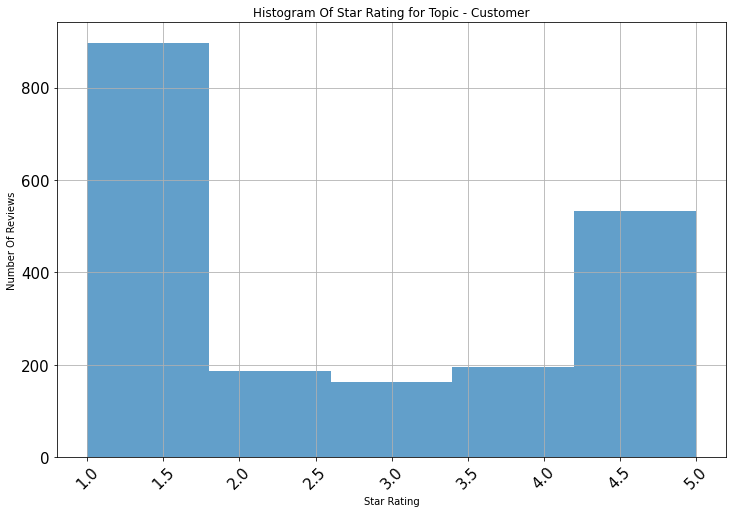

In [16]:
bj_r_text_eng['topic_customer'] = bj_r_text_eng['review'].str.contains('customer')
customer = bj_r_text_eng.loc[bj_r_text_eng['topic_customer'] == True]
customer['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Customer',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

Checking the reviews for "service"


Text(0, 0.5, 'Number Of Reviews')

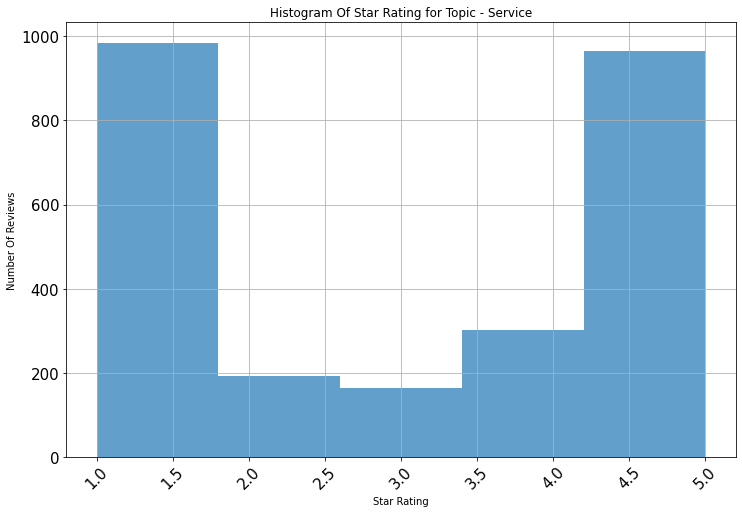

In [17]:
bj_r_text_eng['topic_service'] = bj_r_text_eng['review'].str.contains('service')
service = bj_r_text_eng.loc[bj_r_text_eng['topic_service'] == True]
service['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Service',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

Checking the reviews for "shopping"

Text(0, 0.5, 'Number Of Reviews')

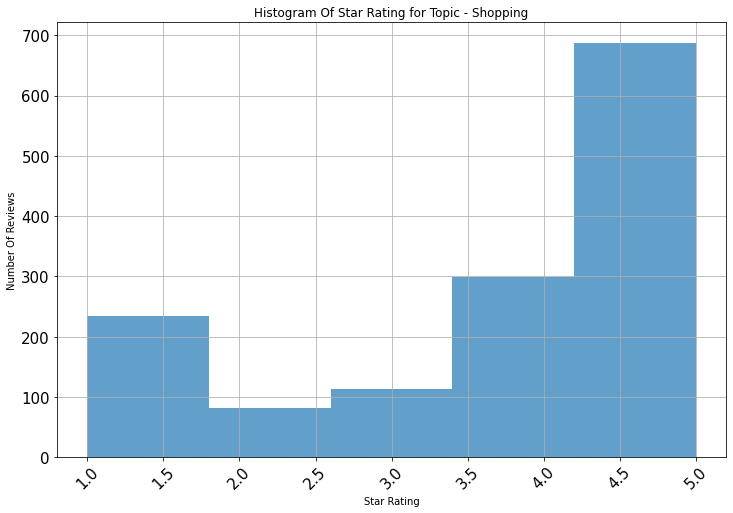

In [18]:
bj_r_text_eng['topic_shopping'] = bj_r_text_eng['review'].str.contains('shopping')
shopping = bj_r_text_eng.loc[bj_r_text_eng['topic_shopping'] == True]
shopping['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Shopping',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

Checking the reviews for "clean"

Text(0, 0.5, 'Number Of Reviews')

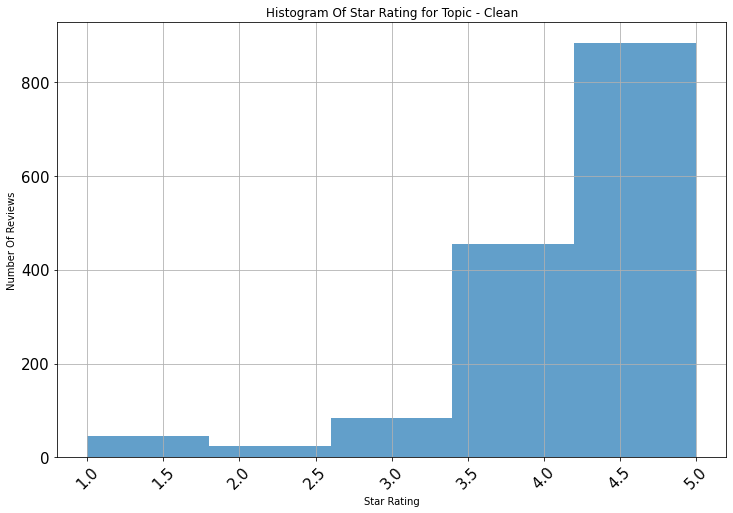

In [19]:
bj_r_text_eng['topic_clean'] = bj_r_text_eng['review'].str.contains('clean')
clean = bj_r_text_eng.loc[bj_r_text_eng['topic_clean'] == True]
clean['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Clean',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

Checking the reviews for "location"

Text(0, 0.5, 'Number Of Reviews')

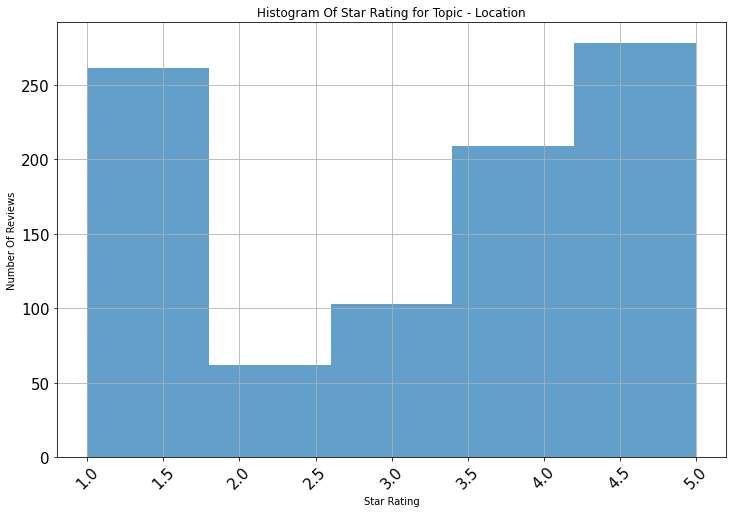

In [20]:
bj_r_text_eng['topic_location'] = bj_r_text_eng['review'].str.contains('location')
location = bj_r_text_eng.loc[bj_r_text_eng['topic_location'] == True]
location['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Location',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

Checking the reviews for "item"

Text(0, 0.5, 'Number Of Reviews')

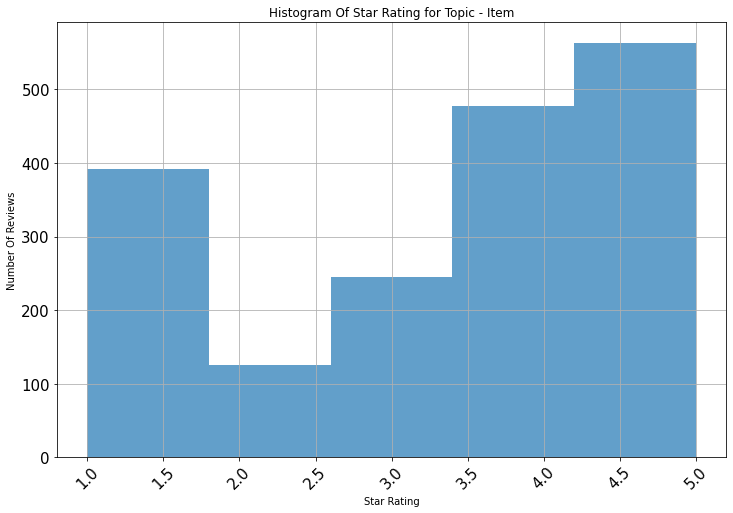

In [21]:
bj_r_text_eng['topic_item'] = bj_r_text_eng['review'].str.contains('item')
item = bj_r_text_eng.loc[bj_r_text_eng['topic_item'] == True]
item['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Item',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

Checking reviews for "staff"

Text(0, 0.5, 'Number Of Reviews')

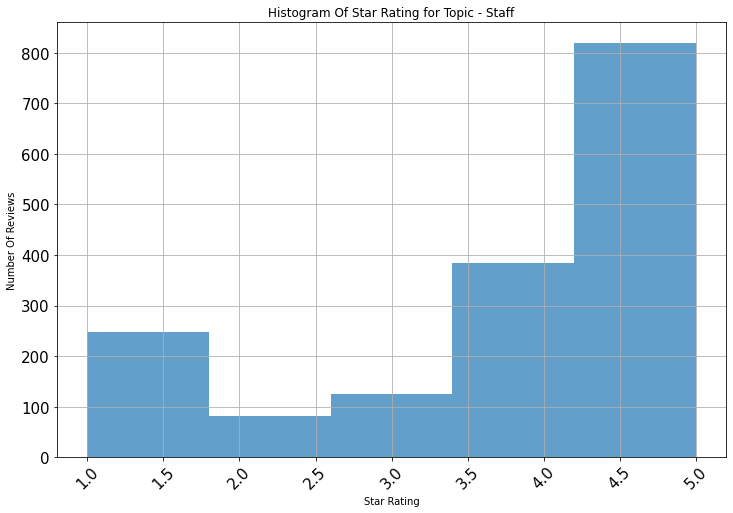

In [22]:
bj_r_text_eng['topic_staff'] = bj_r_text_eng['review'].str.contains('staff')
staff = bj_r_text_eng.loc[bj_r_text_eng['topic_staff'] == True]
staff['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Staff',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

Checking reviews for "deal"

Text(0, 0.5, 'Number Of Reviews')

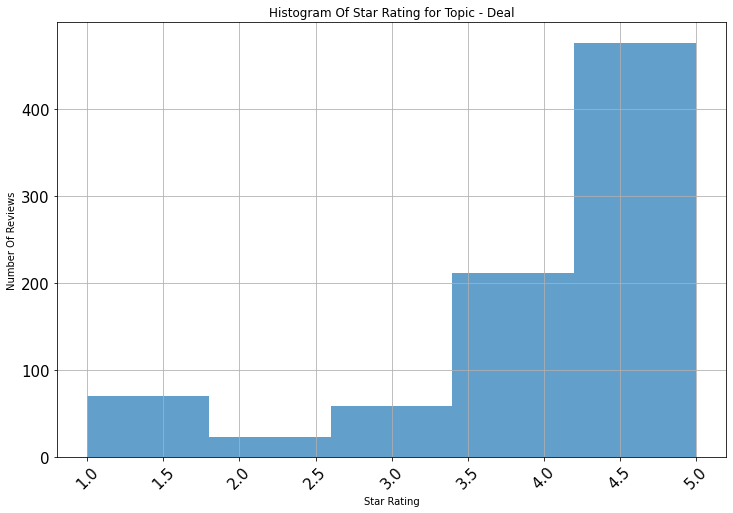

In [23]:
bj_r_text_eng['topic_deal'] = bj_r_text_eng['review'].str.contains('deal')
deal = bj_r_text_eng.loc[bj_r_text_eng['topic_deal'] == True]
deal['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Deal',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

Checking the reviews for "selection"

Text(0, 0.5, 'Number Of Reviews')

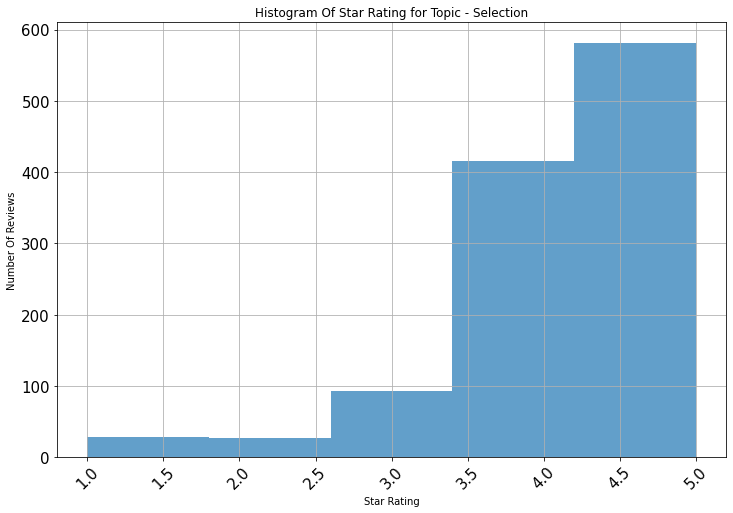

In [24]:
bj_r_text_eng['topic_selection'] = bj_r_text_eng['review'].str.contains('selection')
selection = bj_r_text_eng.loc[bj_r_text_eng['topic_selection'] == True]
selection['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Selection',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

Below are topics that not include under word cloud but show on ngrams

Text(0, 0.5, 'Number Of Reviews')

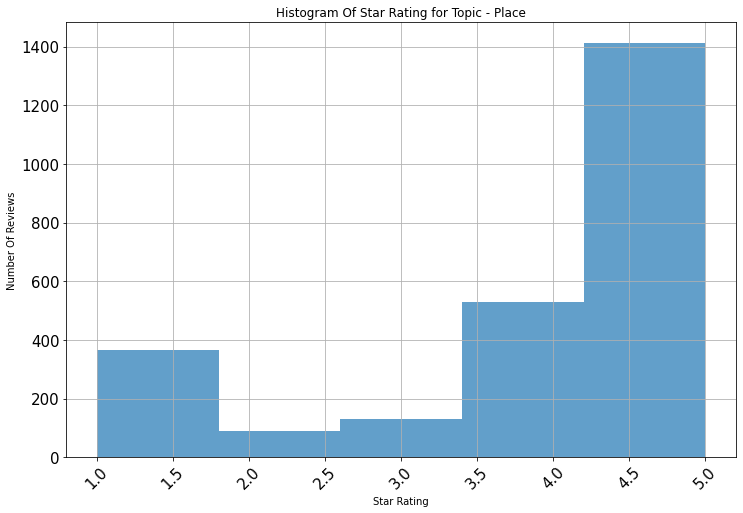

In [25]:
bj_r_text_eng['topic_place'] = bj_r_text_eng['review'].str.contains('place')
place = bj_r_text_eng.loc[bj_r_text_eng['topic_place'] == True]
place['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Place',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

Text(0, 0.5, 'Number Of Reviews')

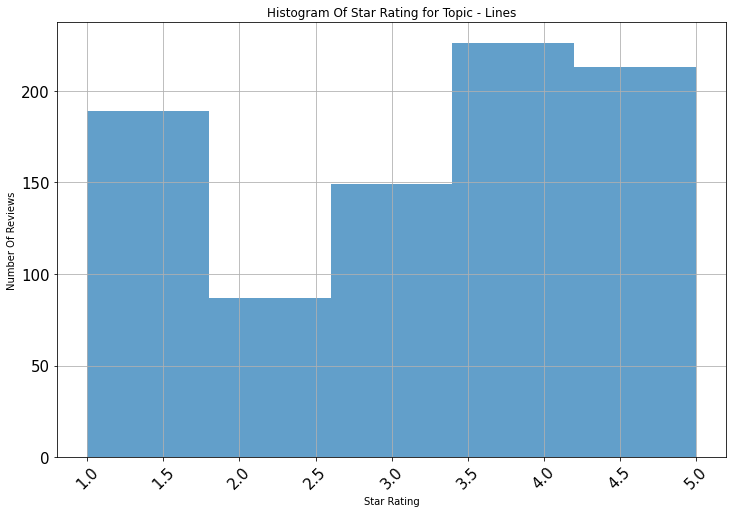

In [26]:
bj_r_text_eng['topic_lines'] = bj_r_text_eng['review'].str.contains('lines')
lines = bj_r_text_eng.loc[bj_r_text_eng['topic_lines'] == True]
lines['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Lines',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

Text(0, 0.5, 'Number Of Reviews')

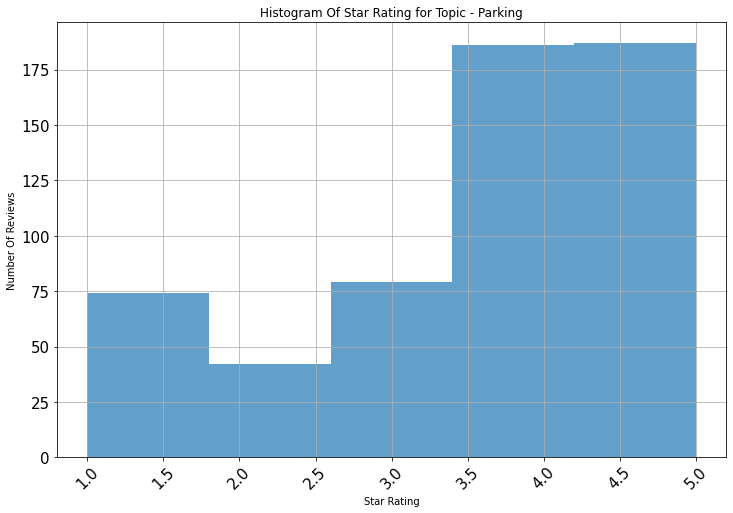

In [27]:
bj_r_text_eng['topic_parking'] = bj_r_text_eng['review'].str.contains('parking')
parking = bj_r_text_eng.loc[bj_r_text_eng['topic_parking'] == True]
parking['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - Parking',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

Text(0, 0.5, 'Number Of Reviews')

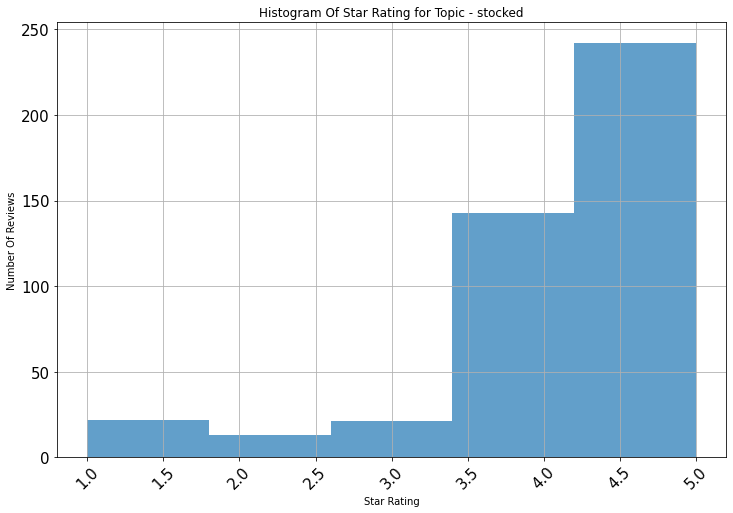

In [28]:
bj_r_text_eng['topic_stocked'] = bj_r_text_eng['review'].str.contains('stocked')
stocked = bj_r_text_eng.loc[bj_r_text_eng['topic_stocked'] == True]
stocked['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Histogram Of Star Rating for Topic - stocked',
           rot=45,
           grid=True,
           figsize=(12,8),
           fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")